# A. Keyword Selection and Data Collection

## 1. Keyword of Interest: Tim Hortons

## 2.	[tweet data] Collect 10K recent tweets on the selected keyword. 

Refer to TwitterCollector.py

In [28]:
from TwitterCollector import TwitterCollector
from datetime import datetime
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter
from textblob import TextBlob
import pickle #pickle data type can store python object
import string
import tweepy

In [29]:
bearer_token = r"AAAAAAAAAAAAAAAAAAAAAPLDhQEAAAAAmuELj%2BL2qylShYPZ1O6TqnmEzS8%3DpVgrqic0kdh2r877UL13EseNwEzYOmyGlB0CYgdM5aME10Hx0z"
# initialize a TwitterCollector instance
tc = TwitterCollector(bearer_token=bearer_token)

In [30]:
with open('TimHortons.json') as infile:
    data = json.load(infile) 
print(type(data))

<class 'dict'>


In [31]:
tweet = []
for i in range(len(data["tweets"])):
    if "Tim Hortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])
    elif "TimHortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])
    elif "tim hortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])
    elif "timhortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])
    elif "Tim hortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])
    elif "Timhortons" in data["tweets"][i]["text"]:
        tweet.append(data["tweets"][i])

In [32]:
print(len(tweet))
#print(tweet[0])

10541


## 3. From the collected tweets, get the list of unique author IDs.

In [35]:
author_id_original=[]
for i in range(len(tweet)):
    author_id_original.append(tweet[i]["author_id"])

In [36]:
# removing the duplications since some authors sent not only one 
author_id = list(set(author_id_original))

In [37]:
print(len(set(author_id)))

8062


## 4. [author data] Collect the author information of those author IDs.

In [38]:
import time
author_info = []

for var in author_id:
    try:
        info = tc.fetch_author_info(var)
        author_info.append(info)
        time.sleep(1)
        
    except tweepy.TooManyRequests: # deal with HTTP Error 409
        print('TooManyRequests')
        time.sleep(15*60)
        
    except AttributeError:
        pass

TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests


In [39]:
print(len(author_info))

8025


In [83]:
pprint(author_info[0])

{'created_at': '2009-03-08T15:32:05.000Z',
 'description': "The real trouble with reality is that there's no background "
                'music..Proud Canadian 🇨🇦',
 'id': '23318274',
 'location': 'North Bay, Ontario',
 'name': 'Shane Gallant',
 'public_metrics': {'followers_count': 443,
                    'following_count': 1476,
                    'listed_count': 1,
                    'tweet_count': 11290},
 'username': 'shane_united',
 'verified': False}


# B. Preliminary Analysis

## 1. The ten most popular words with and without stop words

In [129]:
# Get the text content
tweet_text = []
for i in range(len(tweet)):
    tweet_text.append(tweet[i]["text"])

print(len(tweet_text))
#print(tweet_text[0])

10541


In [131]:
# Transform text into a string for tokenization
tweet_s=''
for var in tweet_text:
    tweet_s += var
# tokenize text file with nltk
tweet_token = nltk.word_tokenize(tweet_s.lower()) # a list
# print(len(tweet_token))
pop_words1 = Counter(tweet_token).most_common(20)
print("20 most popular words:", pop_words1)

20 most popular words: [('@', 19460), (':', 6403), ('.', 5821), ('timhortons', 5809), ('tim', 5309), ('hortons', 5223), ('a', 4891), ('the', 4419), (',', 4080), ('to', 3864), ('#', 3695), ('https', 2986), ('and', 2868), ('i', 2817), ('!', 2729), ('you', 2666), ('is', 2183), ('in', 1992), ('?', 1965), ('of', 1854)]


In [132]:
#Remove punctuation
puncs = string.punctuation
#print(puncs)
table_p = str.maketrans(puncs, len(puncs) * " ") #replacing the puncs in the sentence with same length " "
#print(table_p)
#print(type(table_p))
tweet_s2 = tweet_s.translate(table_p)


tweet_token2 = nltk.word_tokenize(tweet_s2.lower()) # a list
# print(len(tweet_token2))
pop_words2 = Counter(tweet_token2).most_common(20)
#print(pop_words2)

#Remove stop words
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
#print(type(stopwords), len(stopwords), stopwords, sep="\n")

tweet_token3 = [] # our accumulator list
for w in tweet_token2:
    if w not in stopwords and len(w) > 1:
        if w != "https":
            if w != "co":
                tweet_token3.append(w)
# print(len(tweet_token3))

pop_words3 = Counter(tweet_token3).most_common(20)
print("20 most popular words without punctuations and stop words:", pop_words3)

20 most popular words without punctuations and stop words: [('timhortons', 5813), ('tim', 5375), ('hortons', 5263), ('coffee', 1042), ('orange', 909), ('donut', 844), ('today', 765), ('indigenous', 687), ('run', 661), ('sprinkle', 660), ('really', 623), ('rt', 609), ('get', 596), ('working', 544), ('ukraine', 538), ('selling', 522), ('like', 507), ('good', 504), ('kid', 497), ('justintrudeau', 496)]


## 2. The ten most popular hashtags (#hashtag)

In [149]:
# split the string which was created in the question1
tweet_h = tweet_s.split()
tweet_hashtags = []

# use the "#" to locate the hashtags
for i in tweet_h:
    if "#" in i:
        tweet_hashtags.append(i)

hashtags = Counter(tweet_hashtags)
print(hashtags.most_common(10))

[('#GulfKanawut', 236), ('#GULFinManila2022', 235), ('#TimHortons', 205), ('#timhortons', 92), ('#NationalCoffeeDay', 53), ('#SHIB', 47), ('#Crypto', 47), ('#TimsRun', 36), ('#coffee', 35), ('#MahsaAmini', 33)]


## 3. The ten most frequently mentioned usernames (@username)

In [150]:
tweet_n = tweet_s.split()
tweet_usernames = []

# use the "@" to locate the usernames mentioned in the tweets
for i in tweet_n:
    if "@" in i:
        tweet_usernames.append(i.strip(":"))

usernames = Counter(tweet_usernames)
print(usernames.most_common(10))

[('@TimHortons', 3806), ('@JustinTrudeau', 491), ('@AvrilLavigne', 486), ('@Ukraine', 486), ('@WayneGretzky', 486), ('@MoosejawMadness', 485), ('@KimSenklip', 483), ('@MobileSyrup', 456), ('@PURITY_RING', 319), ('@3YearLetterman', 314)]


## 4. The three most common sources of the tweets

In [151]:
tweet_source = []
for i in range(len(tweet)):
    tweet_source.append(tweet[i]["source"])
source = Counter(tweet_source)
print(source.most_common(3))

[('Twitter for iPhone', 4470), ('Twitter for Android', 3198), ('Twitter Web App', 2185)]


## 5. Create a line chart to show the time trend of tweet counts (number of tweets in a day)

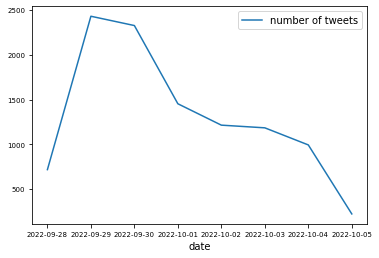

In [136]:
# abstract date information from the "created_at"
tweet_day = []
for i in range(len(tweet)):
    tweet_day.append(tweet[i]["created_at"][0:10])

# count the number of tweets in a day
day = Counter(tweet_day)

# transform the datatype into dataframe and sort in order
df_day = pd.DataFrame.from_dict(day, orient="index").reset_index()
df_day = df_day.rename(columns={"index": "date", 0: "number of tweets"})
df_day = df_day.sort_values(by="date", ascending=True)

# plot the line chart
df_day.plot(x="date", y="number of tweets")
plt.xticks(size=7) 
plt.yticks(size=7)
plt.show()

# print the plot
plt.savefig('date_number of tweets.pdf')

In [137]:
tweet_influence = []
for i in range(len(tweet)):
    influence = {}
    a = tweet[i]["public_metrics"]
    influence["id"] = tweet[i]['id'] 
    influence["text"] = tweet[i]["text"]
    influence["influence score"] = a["retweet_count"] + a["reply_count"] + a["like_count"] + a["quote_count"]
    tweet_influence.append(influence)

# quote from https://blog.csdn.net/justinzwd/article/details/90643488 , to prevent print results from being collapsed and displayed incompletely
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# transform the list into dataframe and sort in order
df_tweet_influence = pd.DataFrame(tweet_influence)
df_tweet_influence = df_tweet_influence.sort_values(by="influence score", ascending=False)
print(df_tweet_influence[0:3])

                        id                                               text  \
9400   1575369957583785985  RT @nothinbutlag: im at tim hortons and they f...   
10047  1575209851529351170  RT @nothinbutlag: im at tim hortons and they f...   
9923   1575240457353048064  RT @nothinbutlag: im at tim hortons and they f...   

       influence score  
9400             18384  
10047            18384  
9923             18384  


In [68]:
#without duplications
tweet_influence_clean = {}
for i in range(len(tweet)):
    a = tweet[i]["public_metrics"]
    tweet_influence_clean[tweet[i]["text"]] = a["retweet_count"] + a["reply_count"] + a["like_count"] + a["quote_count"]

# transform the dictionary into dataframe and sort in order
df_tweet_influence_clean = pd.DataFrame.from_dict(tweet_influence_clean, orient="index").reset_index()
df_tweet_influence_clean = df_tweet_influence_clean.rename(columns={"index": "tweet", 0: "influence score"})
df_tweet_influence_clean = df_tweet_influence_clean.sort_values(by="influence score", ascending=False)
print(df_tweet_influence_clean[0:3])

                                                  tweet  influence score
7072  RT @nothinbutlag: im at tim hortons and they f...            18384
4663  There is a Indigenous kid out there working at...             5502
362   RT @TimHortons: Tims x Justin Bieber. Coming S...             4935


## 6. The three most vocal authors on the keyword (The most frequently tweeting authors in the tweet data)

In [138]:
# use Counter to get the three most vocal authors' id
vocal_author_id = Counter(author_id_original).most_common(3)
vocal_author_id

[('2907144851', 191), ('1574776030388273155', 57), ('88212909', 41)]

In [154]:
# use id to find the corresponding author information in author_info
vocal_authors = []
for i in list(vocal_author_id):
    i = tuple(i) 
    for j in author_info:
        if i[0] == j["id"]:
            a = {}
            a["author_id"] = i[0]
            a["name"] = j["name"]
            a["username"] = j["username"]
            a["number of tweets"] = i[1]
            vocal_authors.append(a)
pprint(vocal_authors)    

[{'author_id': '2907144851',
  'name': 'The Mighty Oak',
  'number of tweets': 191,
  'username': 'b_oaktree'},
 {'author_id': '1574776030388273155',
  'name': 'nazli sesli',
  'number of tweets': 57,
  'username': 'giftcard1221'},
 {'author_id': '88212909',
  'name': 'M.J. Maj',
  'number of tweets': 41,
  'username': '12Faya'}]


## 7. The three most influential authors 

A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”. “tweet_count” in the author data.

In [143]:
# calculate the influence score
influential_authors = []
for i in range(len(author_info)):
    authors = {}
    a = author_info[i]["public_metrics"]
    authors["id"] = author_info[i]['id']
    authors["name"] = author_info[i]["name"]
    authors["influence score"] = a['followers_count'] + a['followers_count'] + a['tweet_count'] + a['listed_count']
    influential_authors.append(authors)

# transform the list into dataframe and sort in order
df_influential_authors = pd.DataFrame(influential_authors)
df_influential_authors = df_influential_authors.sort_values(by="influence score", ascending=False)
print(df_influential_authors[0:3])

             id            name  influence score
3774   12848262    Toronto Star          2771995
6337  348056057      FaZe Pamaj          2593762
727    70725301  Renee Paquette          2507642


# C. Word Cloud 

Create a word cloud from the collected tweets.

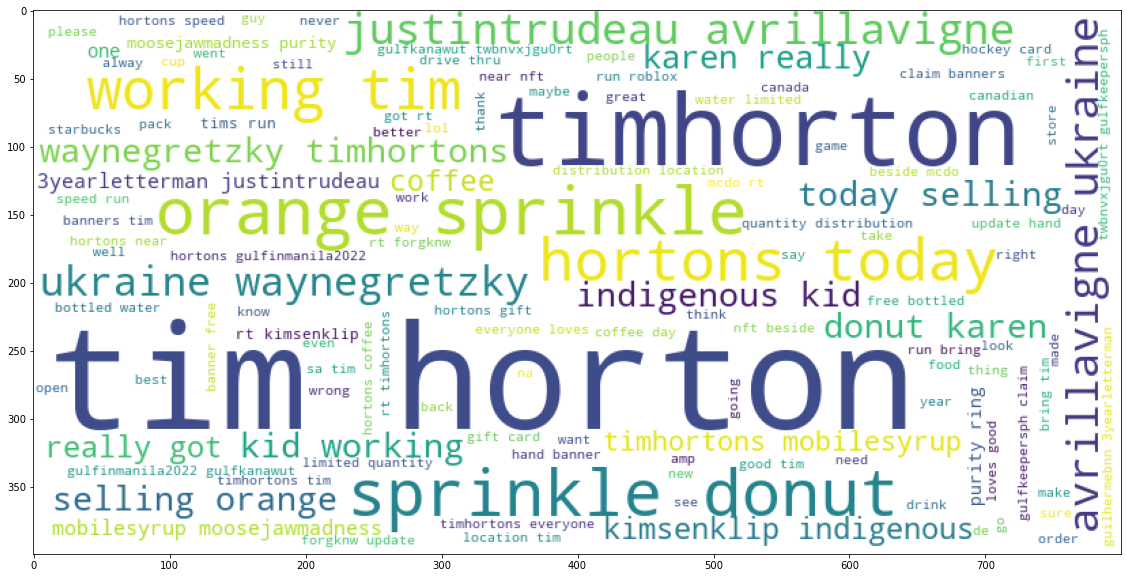

In [144]:
tweet_s2=''
for var in tweet_token3:
    if "https" not in var:
        if "t.co" not in var:
            tweet_s2 += " "
            tweet_s2 += var

wordcloud = WordCloud(width=800, height=400,background_color ='white', min_font_size = 10).generate(tweet_s2) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('TimHortons_wordcloud.png') # save as PNG file
plt.show()  # show in Jupyter notebook

# D. Sentiment Analysis

Using TextBlob, calculate the polarity and subjectivity scores for the collected tweets

## 1. The average polarity and subjectivity scores

In [145]:
#Creating pandas dataframe
id_list =[]
author_list = []
text_list = []
for i in range(len(tweet)):
    id_list.append(tweet[i]["id"])
    author_list.append(tweet[i]["author_id"])
    text_list.append(tweet[i]["text"])
d = {"id":id_list, "author":author_list, "text":text_list}
tweet_df= pd.DataFrame(data = d)

#generating polarity score & subjectivity score
polarity = []
subjectivity=[]
for s in tweet_df.text:
    tb = TextBlob(s)
    polarity.append(tb.sentiment.polarity)
    subjectivity.append(tb.sentiment.subjectivity)

tweet_df["polarity"] = polarity
tweet_df["subjectivity"] = subjectivity

#calculating average
avg_polarity = tweet_df["polarity"].mean()
print("Average Polarity Score:", avg_polarity)
avg_subjectivity = tweet_df["subjectivity"].mean()
print("Average Subjectivity Score:", avg_subjectivity)

Average Polarity Score: 0.10586593661653952
Average Subjectivity Score: 0.31304881947850843


## 2. Visualize the polarity and subjectivity score distributions using histograms, where X-axis is the score and Y-axis is the tweet count in the score bin.

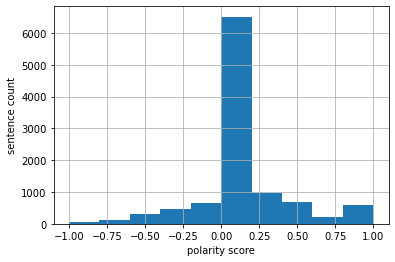

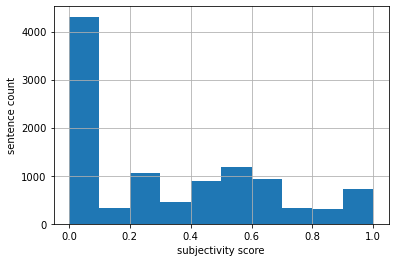

In [146]:
plt.hist(tweet_df["polarity"] , bins=10) #, normed=1, alpha=0.75)

plt.xlabel('polarity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('polarity.pdf')
plt.show()

plt.hist(tweet_df["subjectivity"] , bins=10) #, normed=1, alpha=0.75)

plt.xlabel('subjectivity score')
plt.ylabel('sentence count')
plt.grid(True)
plt.savefig('subjectivity.pdf')
plt.show()

## 3. The most positive and negative tweets on the keyword based on the polarity scores 

Why is the author happy/angry on the topic? If there are multiple tweets with same sentiment scores, pick 2-3 tweets among them.

In [147]:
"""
Due to retweets in the dataset, there is duplication regarding the highest and lowest polarity scores. 
Therefore, we print out 10 observations for both cases to select non-duplicate texts.
"""
# positive
p=tweet_df.sort_values(by=['polarity'])[-10:]
print(tweet_df.sort_values(by=['polarity'])[-10:]["text"])
# negative
n=tweet_df.sort_values(by=['polarity'])[:10]
print(tweet_df.sort_values(by=['polarity'])[:10]["text"])

1223    RT @TimHortons: Everyone loves a good Tims Run...
1221    RT @TimHortons: Everyone loves a good Tims Run...
3600    RT @TimHortons: Everyone loves a good Tims Run...
5711    RT @TimHortons: Everyone loves a good Tims Run...
5706    RT @TimHortons: Everyone loves a good Tims Run...
5705    @3YearLetterman @JustinTrudeau @AvrilLavigne @...
249      @Salkou @UpperDeckHockey @TimHortons Amazing!!!!
5696    RT @TimHortons: Everyone loves a good Tims Run...
5683    The orange donuts @TimHortons are selling toda...
2313    he knows the ins and outs of ordering the perf...
Name: text, dtype: object
5736    @DrJayDrNo @uBer_Poutine This is why I didn't ...
8160    RT @NewfieScumbag: Tim hortons about to drop t...
8223    RT @NewfieScumbag: Tim hortons about to drop t...
6507    RT @NewfieScumbag: Tim hortons about to drop t...
8561    RT @GH39124864: @TimHortons Wil never buy the ...
5212    @Da_T00n @TimHortons this is fucking horrible ...
9441                              Tim Hortons 

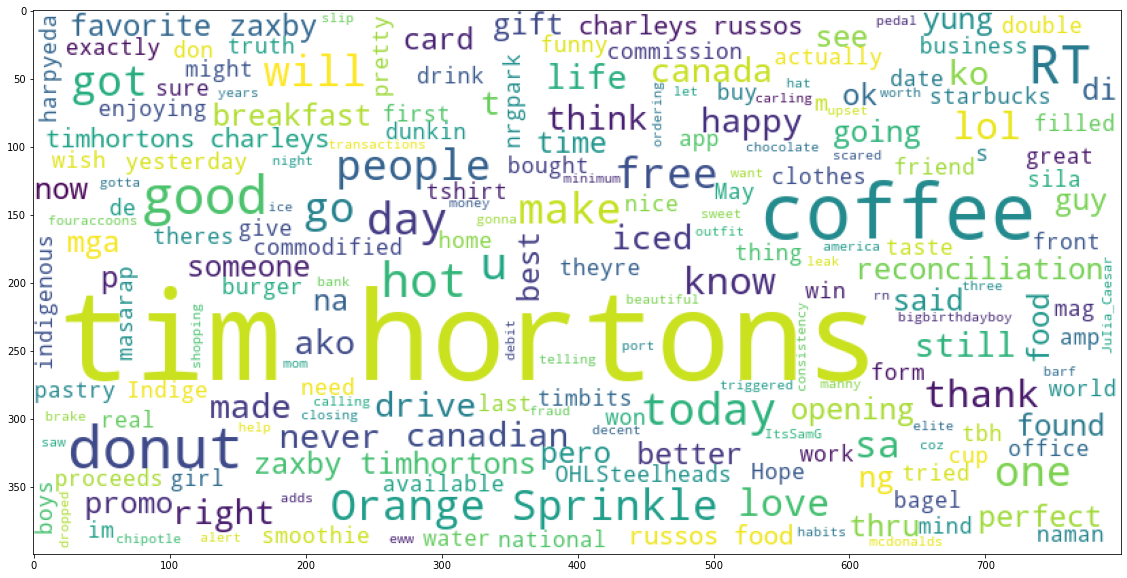

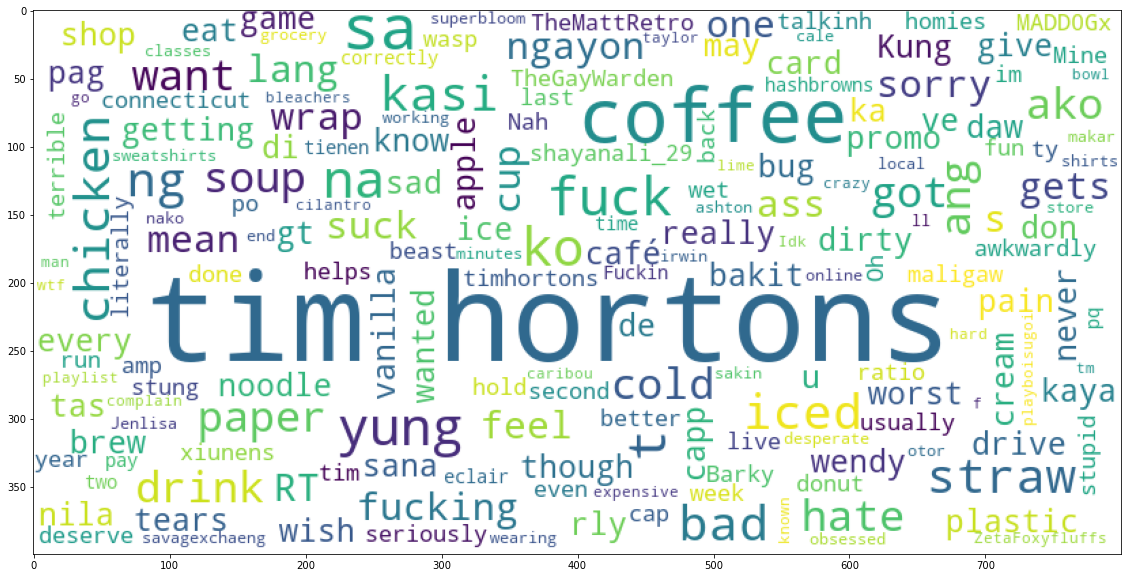

In [148]:
#Plotting WordClouds for high polarity tweets
pos = tweet_df[tweet_df["polarity"] >= 0.25]

pos_text = ''
for var in pos.text:
    if "https" not in var:
        if "t.co" not in var:
            if "Tim" not in var:
                pos_text += " "
                pos_text += var

wordcloud = WordCloud(width=800, height=400,background_color ='white', min_font_size = 10).generate(pos_text) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('pos_wordcloud.png') # save as PNG file
plt.show()  # show in Jupyter notebook
    

#Plotting WordClouds for low polarity tweets
neg = tweet_df[tweet_df["polarity"] <= -0.25]

neg_text = ''
for var in neg.text:
    if "https" not in var:
        if "t.co" not in var:
            if "Tim" not in var:
                neg_text += " "
                neg_text += var

wordcloud = WordCloud(width=800, height=400,background_color ='white', min_font_size = 10).generate(neg_text) # note that text is a string, not a list

# Display the generated image:
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('neg_wordcloud.png') # save as PNG file
plt.show()  # show in Jupyter notebook